In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv('recruitment_data.csv')  # Replace with your actual dataset file


In [2]:
print(data.head())

   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2                    2 

In [3]:
print(data.isnull().sum)

<bound method DataFrame.sum of         Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0     False   False           False            False              False   
1     False   False           False            False              False   
2     False   False           False            False              False   
3     False   False           False            False              False   
4     False   False           False            False              False   
...     ...     ...             ...              ...                ...   
1495  False   False           False            False              False   
1496  False   False           False            False              False   
1497  False   False           False            False              False   
1498  False   False           False            False              False   
1499  False   False           False            False              False   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalitySc

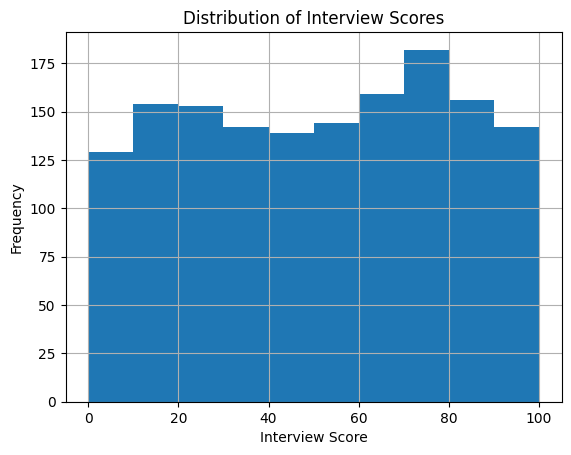

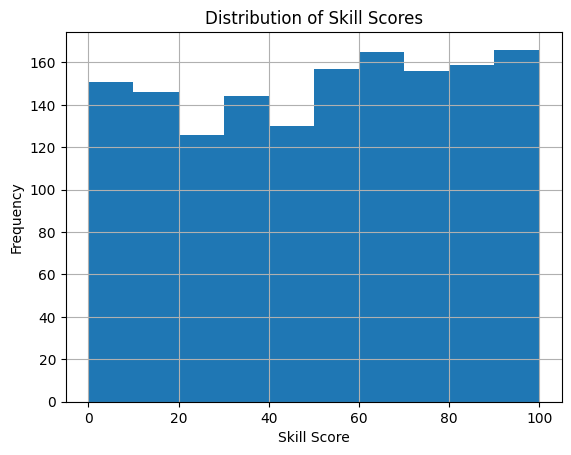

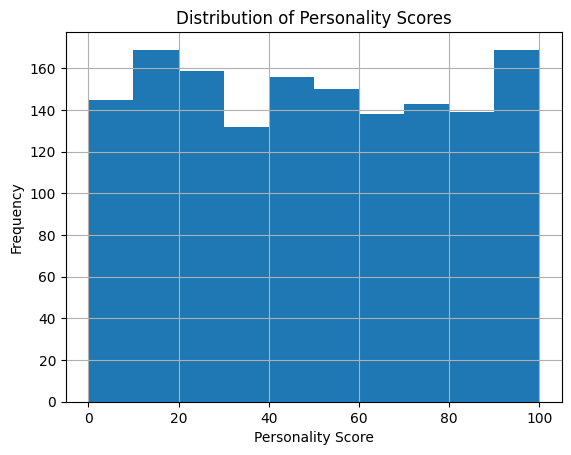

In [4]:
data['InterviewScore'].hist(bins=10)
plt.xlabel('Interview Score')
plt.ylabel('Frequency')
plt.title('Distribution of Interview Scores')
plt.show()

data['SkillScore'].hist(bins=10)
plt.xlabel('Skill Score')
plt.ylabel('Frequency')
plt.title('Distribution of Skill Scores')
plt.show()


data['PersonalityScore'].hist(bins=10)
plt.xlabel('Personality Score')
plt.ylabel('Frequency')
plt.title('Distribution of Personality Scores')
plt.show()

Text(0.5, 1.0, 'Experience vs Hiring Decision')

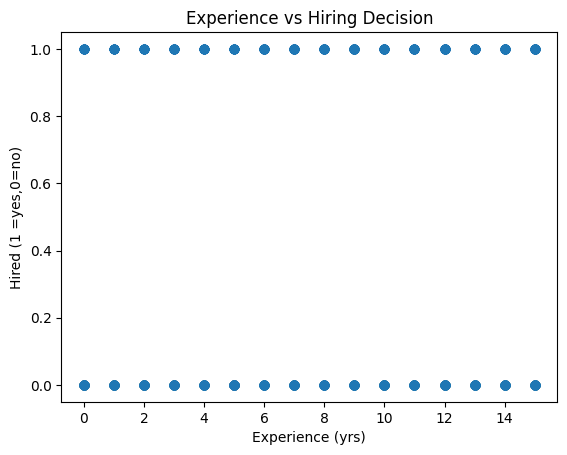

In [5]:
plt.scatter(data['ExperienceYears'],data['HiringDecision'])
plt.xlabel('Experience (yrs)')
plt.ylabel('Hired (1 =yes,0=no)')
plt.title('Experience vs Hiring Decision')

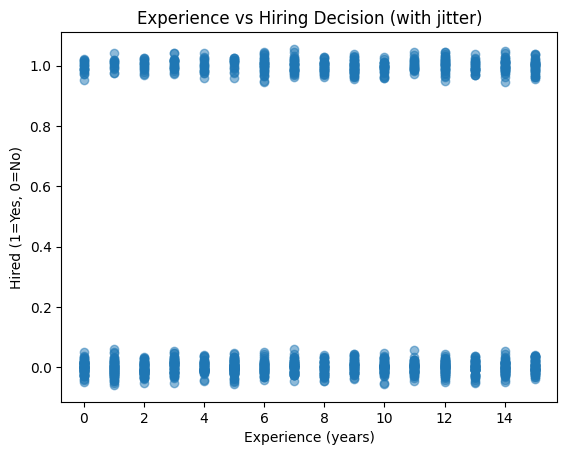

In [6]:
y_jitter = data['HiringDecision'] + np.random.normal(0, 0.02, size=len(data))

plt.scatter(data['ExperienceYears'], y_jitter, alpha=0.5)
plt.xlabel('Experience (years)')
plt.ylabel('Hired (1=Yes, 0=No)')
plt.title('Experience vs Hiring Decision (with jitter)')
plt.show()

In [7]:
# # The plot still suggests a strong correlation between experience and hiring decisions.
# Individuals with 8 or more years of experience are significantly more likely to be hired
# compared to those with less than 8 years of experience. The jitter simply helps to visualize the
# data more clearly.

In [8]:
data.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


Correlation Matrix:
Age: {'Age': 0.9993333333333341, 'Gender': 0.01127853620224295, 'EducationLevel': 0.032587772783488504, 'ExperienceYears': 0.024763618774505308, 'PreviousCompanies': -0.03255794438834307, 'DistanceFromCompany': -0.021017443385397683, 'InterviewScore': -0.025561595436791457, 'SkillScore': -0.008062988782933815, 'PersonalityScore': 0.03770197424172431, 'RecruitmentStrategy': 0.018052008643863846, 'HiringDecision': 0.0018485851664770264}
Gender: {'Age': 0.01127853620224295, 'Gender': 0.9993333333333291, 'EducationLevel': 0.009669694627828001, 'ExperienceYears': -0.028483166267516926, 'PreviousCompanies': -0.06187372843428831, 'DistanceFromCompany': 0.003819913923512851, 'InterviewScore': -0.020873171578855765, 'SkillScore': 0.012324966421909745, 'PersonalityScore': 0.02371306425120289, 'RecruitmentStrategy': -0.023736913282084233, 'HiringDecision': -0.002247470073917839}
EducationLevel: {'Age': 0.032587772783488504, 'Gender': 0.009669694627828001, 'EducationLevel': 0.9

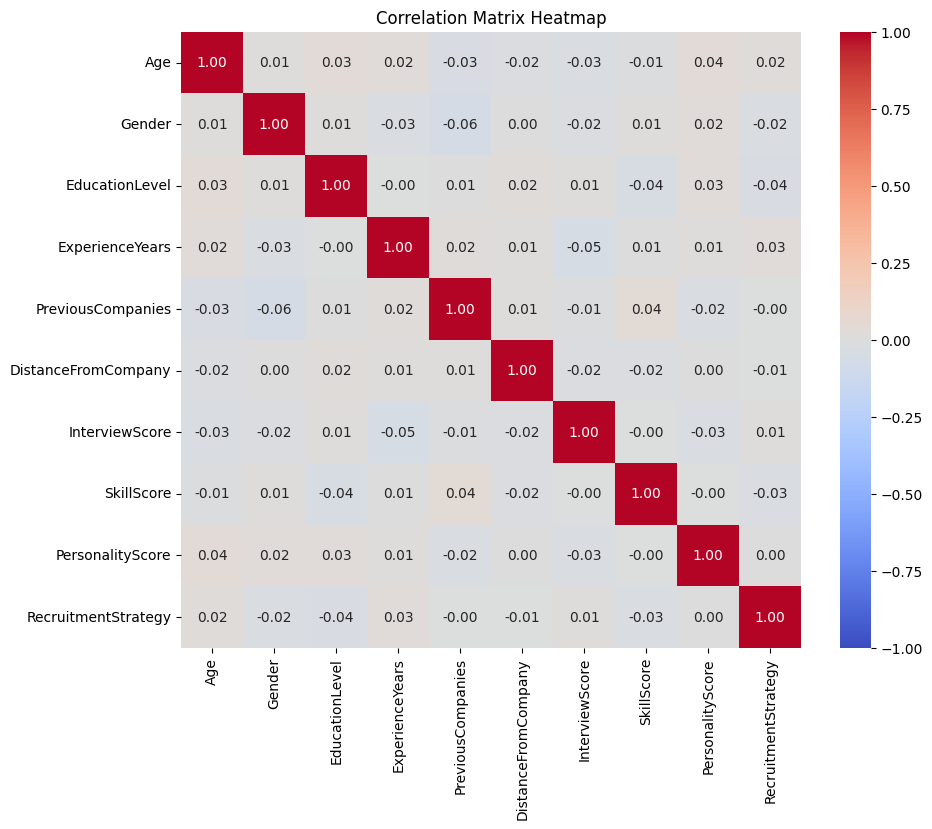

In [9]:
class DataFrame:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def calculate_correlation_matrix(self):
        # Get numerical columns
        numerical_columns = self.df.select_dtypes(include=['float64', 'int64']).columns
        num_cols = len(numerical_columns)

        # Create an empty correlation matrix
        corr_matrix = {col: {col2: 0 for col2 in numerical_columns} for col in numerical_columns}

        for i in range(num_cols):
            for j in range(i, num_cols):
                col1 = numerical_columns[i]
                col2 = numerical_columns[j]

                # Calculate mean
                mean1 = self.df[col1].mean()
                mean2 = self.df[col2].mean()

                # Calculate covariance
                covariance = ((self.df[col1] - mean1) * (self.df[col2] - mean2)).mean()

                # Calculate standard deviations
                std_dev1 = self.df[col1].std()
                std_dev2 = self.df[col2].std()

                # Calculate correlation
                correlation = covariance / (std_dev1 * std_dev2)

                # Store in matrix
                corr_matrix[col1][col2] = correlation
                corr_matrix[col2][col1] = correlation  # Symmetric matrix

        return corr_matrix

    def display_correlation_matrix(self):
        corr_matrix = self.calculate_correlation_matrix()
        print("Correlation Matrix:")
        for col1, row in corr_matrix.items():
            print(f"{col1}: {row}")

file_path = 'recruitment_data.csv'
df = DataFrame(file_path)
df.display_correlation_matrix()

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('recruitment_data.csv')
num_df = df.select_dtypes(include=['float64', 'int64'])
num_df = df.drop('HiringDecision', axis=1)


# Compute the correlation matrix
corr_matrix = num_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix Heatmap')
plt.show()

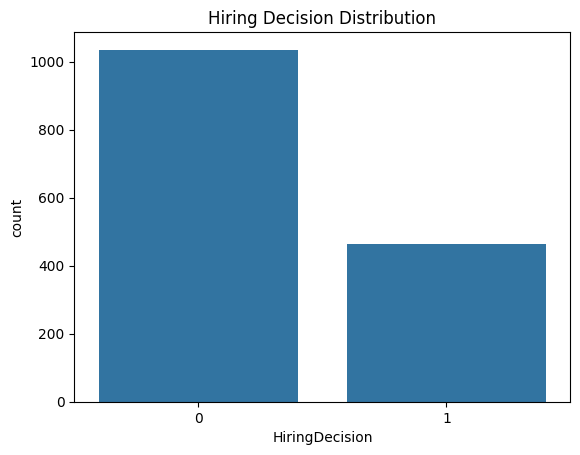

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable
sns.countplot(x='HiringDecision', data=data)
plt.title('Hiring Decision Distribution')
plt.show()


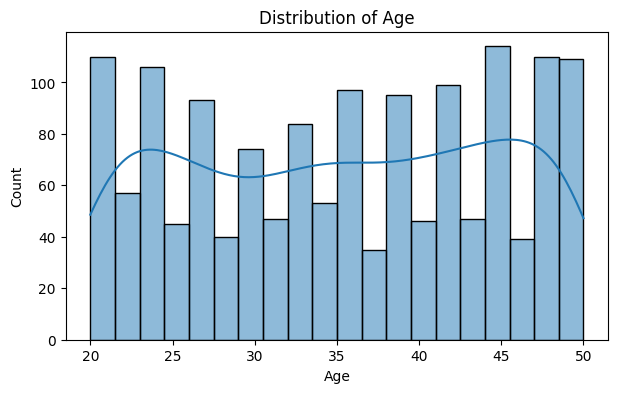

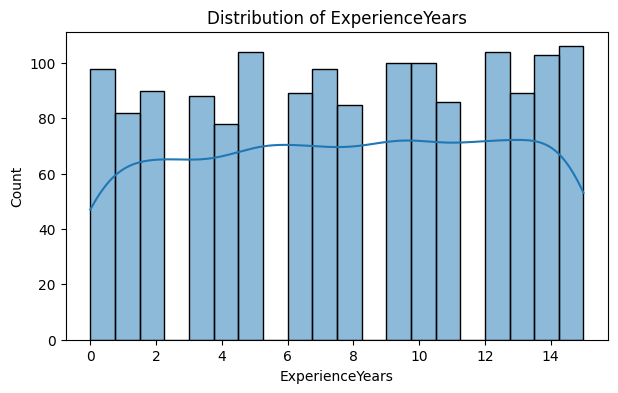

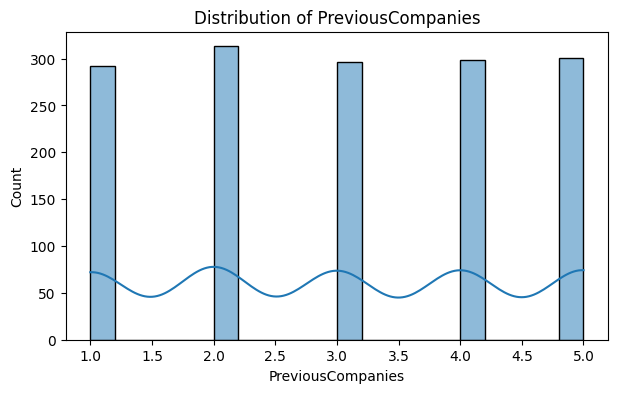

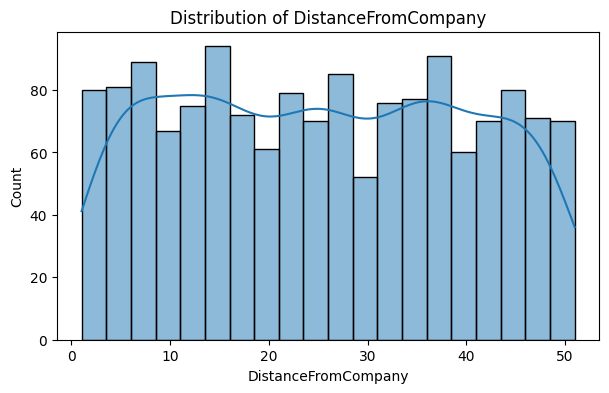

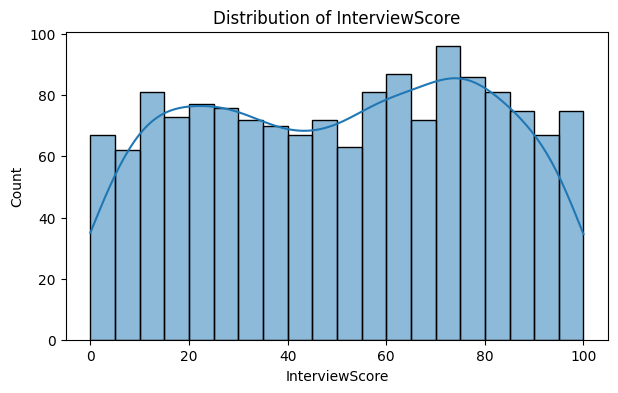

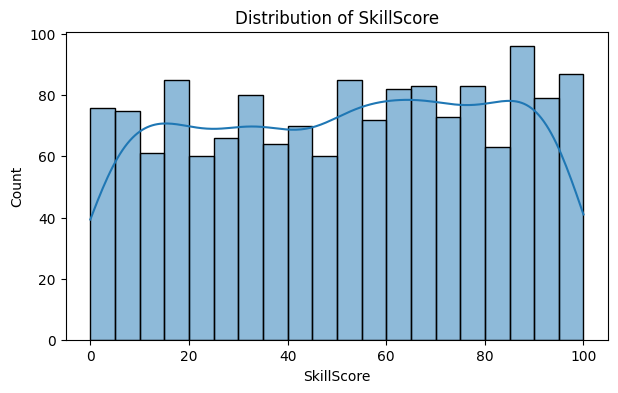

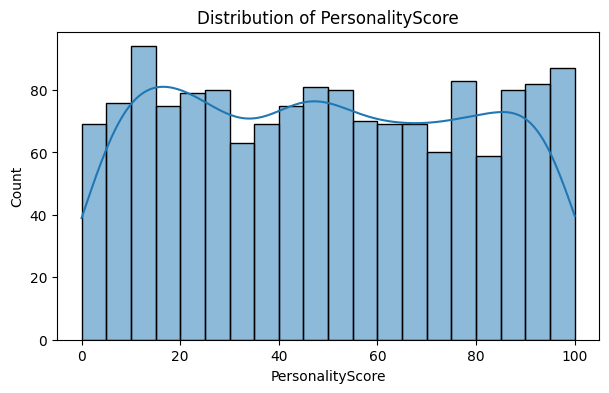

In [11]:
# Plot histograms for all numerical features
numerical_columns = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

for column in numerical_columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()


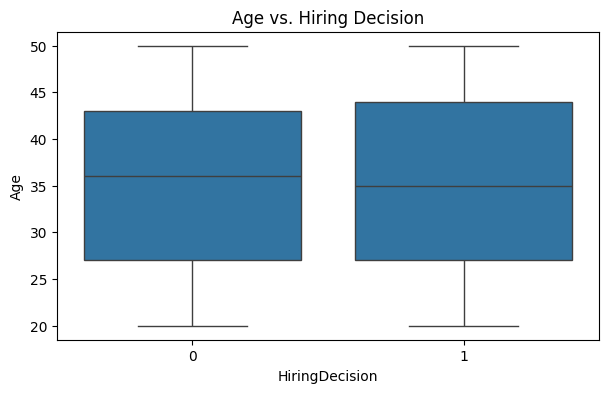

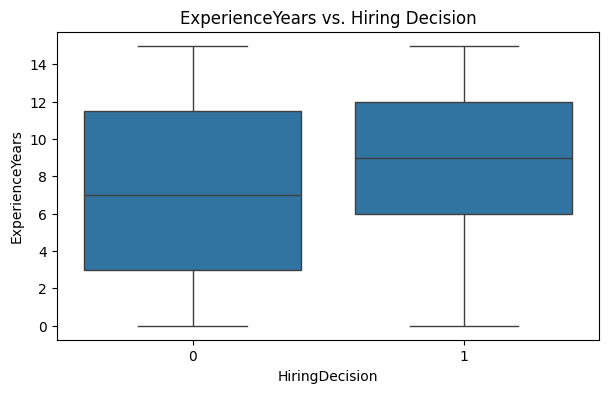

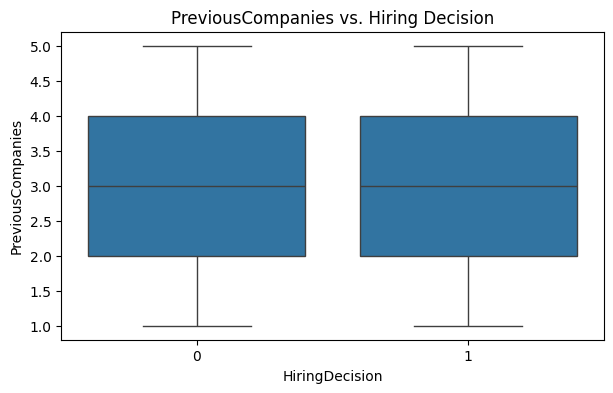

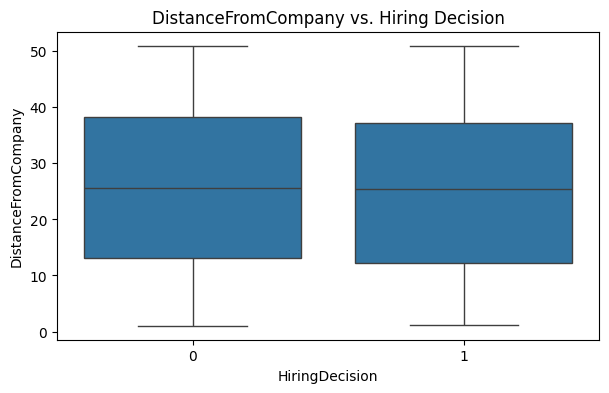

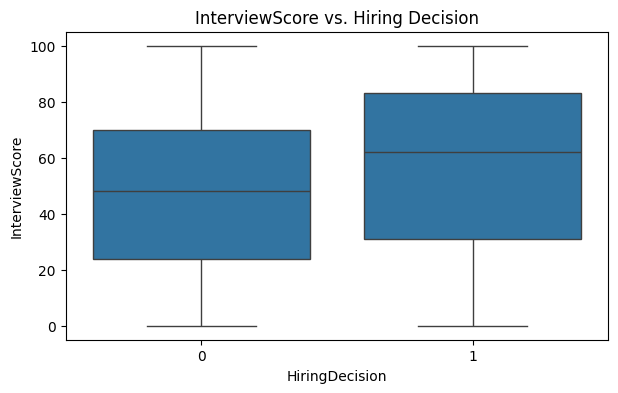

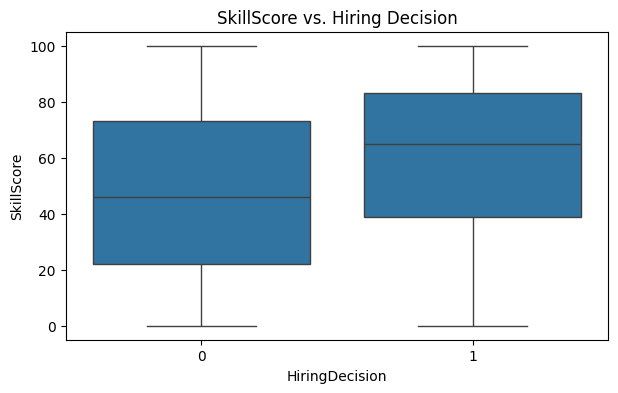

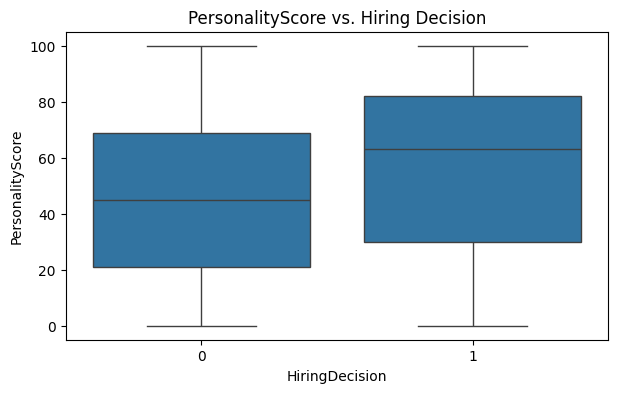

In [12]:
# Boxplots for each numerical variable against the Hiring Decision
for column in numerical_columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x='HiringDecision', y=column, data=data)
    plt.title(f'{column} vs. Hiring Decision')
    plt.show()


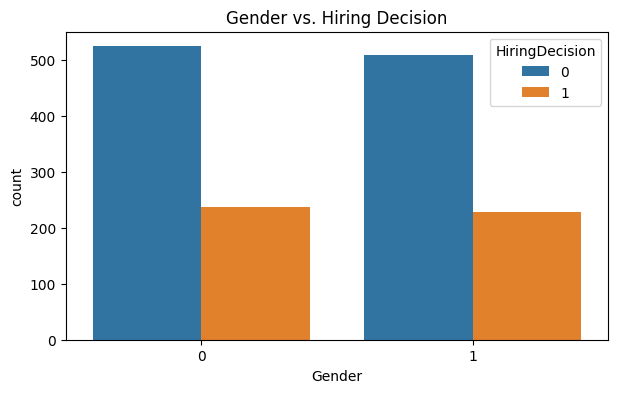

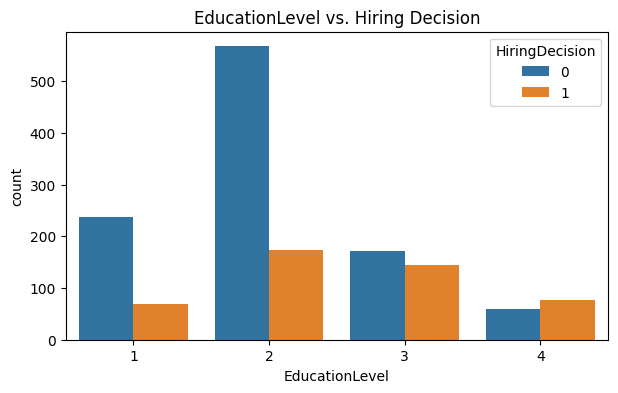

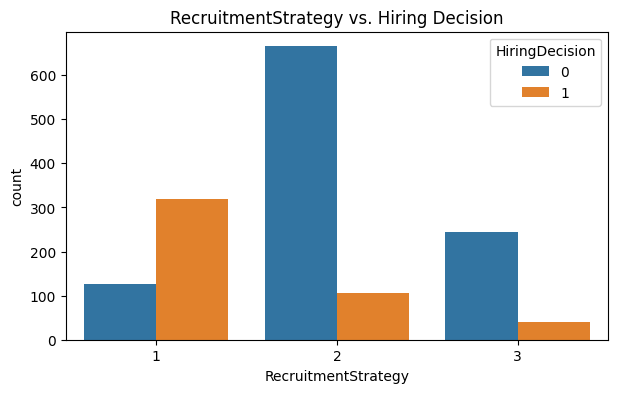

In [13]:
# Categorical variables
categorical_columns = ['Gender', 'EducationLevel', 'RecruitmentStrategy']

for column in categorical_columns:
    plt.figure(figsize=(7, 4))
    sns.countplot(x=column, hue='HiringDecision', data=data)
    plt.title(f'{column} vs. Hiring Decision')
    plt.show()


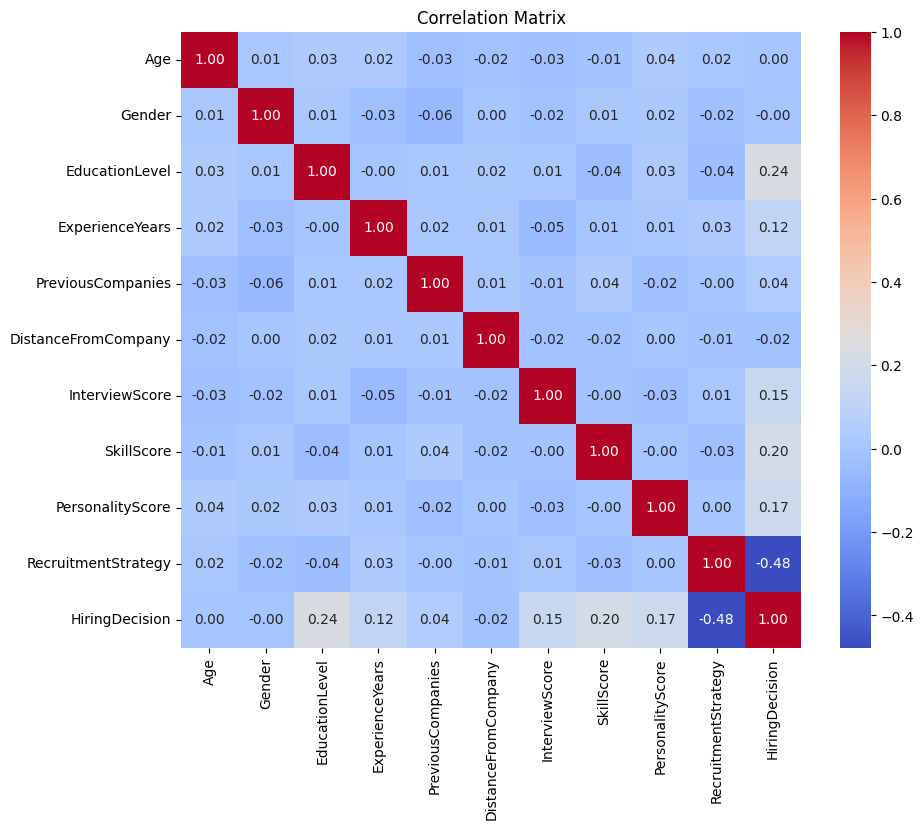

In [14]:
# Compute correlation matrix
corr = data.corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [15]:
from scipy.stats import pointbiserialr

# Point biserial correlation of numerical features with target variable
for column in numerical_columns:
    correlation, p_value = pointbiserialr(data[column], data['HiringDecision'])
    print(f'{column} vs Hiring Decision: correlation={correlation}, p-value={p_value}')


Age vs Hiring Decision: correlation=0.001849818378729497, p-value=0.9429333766900795
ExperienceYears vs Hiring Decision: correlation=0.12249365610595596, p-value=1.9539247921307973e-06
PreviousCompanies vs Hiring Decision: correlation=0.04402482720266414, p-value=0.08829159908024581
DistanceFromCompany vs Hiring Decision: correlation=-0.016791009838420544, p-value=0.5158106383232123
InterviewScore vs Hiring Decision: correlation=0.1460640322503263, p-value=1.3248978688099356e-08
SkillScore vs Hiring Decision: correlation=0.20366806036497975, p-value=1.651166296601168e-15
PersonalityScore vs Hiring Decision: correlation=0.16917725422046587, p-value=4.271768628215494e-11


In [16]:
from scipy.stats import chi2_contingency

# Chi-square test for categorical variables with the target
for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['HiringDecision'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'{column} vs Hiring Decision: chi2={chi2}, p-value={p}')


Gender vs Hiring Decision: chi2=0.000977654050669581, p-value=0.9750562409245631
EducationLevel vs Hiring Decision: chi2=103.67468918958703, p-value=2.5190323277589304e-22
RecruitmentStrategy vs Hiring Decision: chi2=489.68130867975196, p-value=4.645739720431346e-107


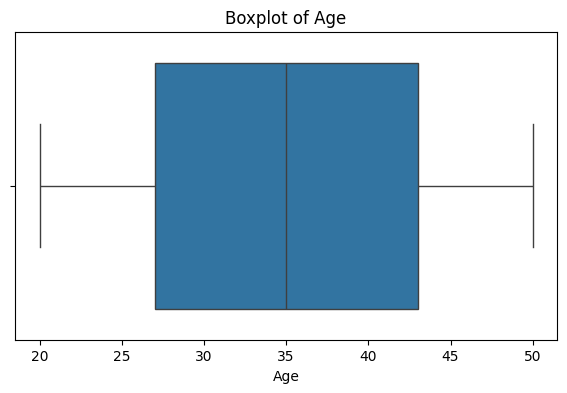

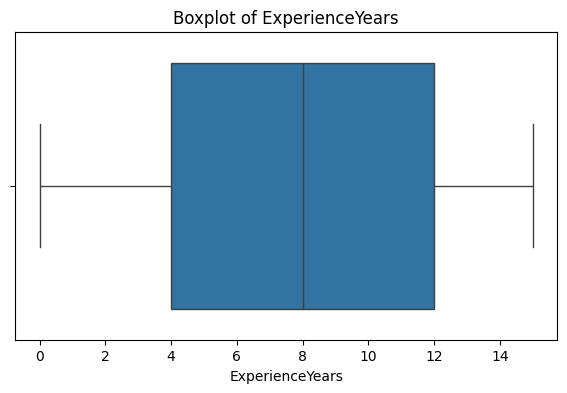

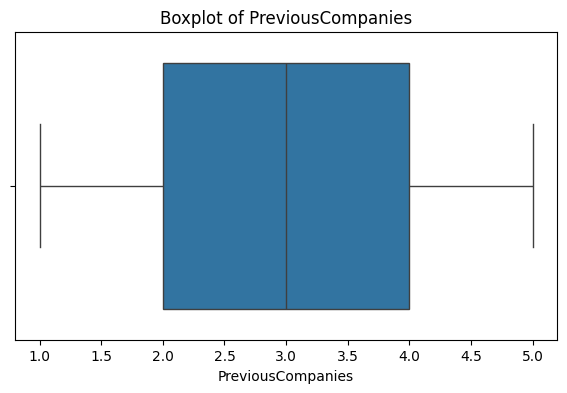

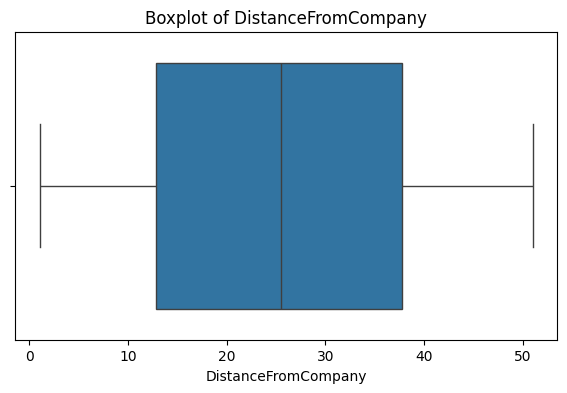

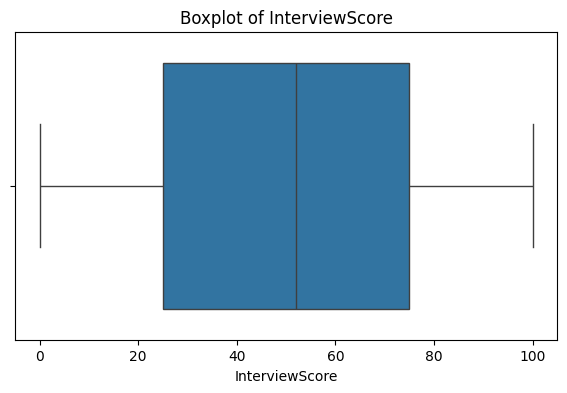

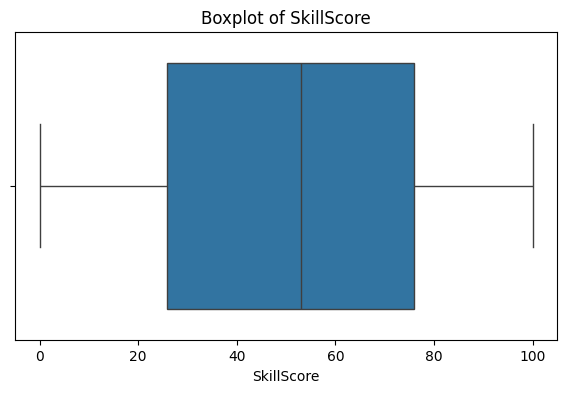

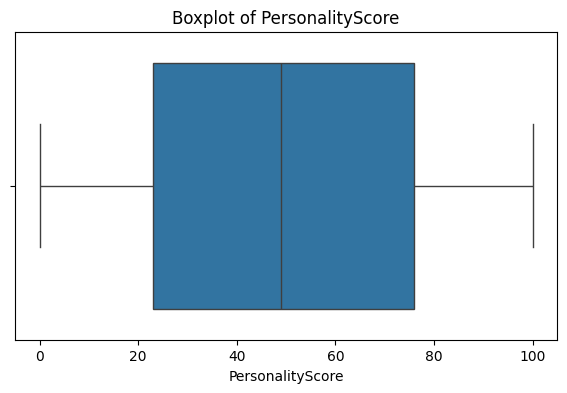

In [17]:
# Detect outliers using boxplots for numerical variables
for column in numerical_columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [18]:
from imblearn.over_sampling import SMOTE

# Separate input features (X) and target variable (y)
X = data.drop('HiringDecision', axis=1)
y = data['HiringDecision']

# Apply SMOTE for balancing the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the new class distribution
print(y_resampled.value_counts())


HiringDecision
1    1035
0    1035
Name: count, dtype: int64


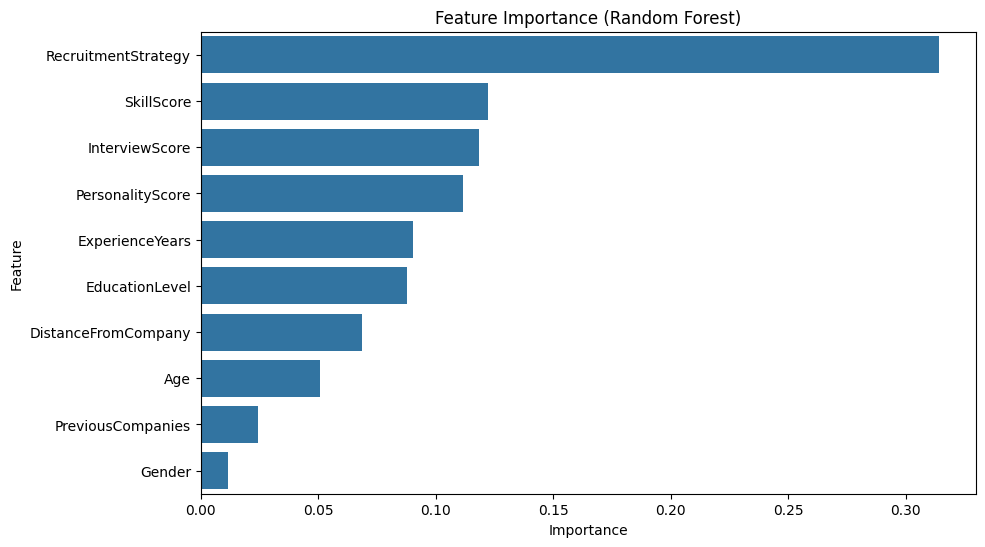

In [19]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a Random Forest model to identify important features
X = data.drop('HiringDecision', axis=1)
y = data['HiringDecision']

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame to visualize
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [20]:
#one hot encoding education level

unique_categories = data['EducationLevel'].unique();

for category in unique_categories:
    data[f'EducationLevel_{category}'] = (data['EducationLevel'] == category).astype(int)

print(data);

      Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0      26       1               2                0                  3   
1      39       1               4               12                  3   
2      48       0               2                3                  2   
3      34       1               2                5                  2   
4      30       0               1                6                  1   
...   ...     ...             ...              ...                ...   
1495   48       0               2                3                  4   
1496   27       1               2               10                  3   
1497   24       1               1                1                  2   
1498   48       0               2                4                  4   
1499   34       1               2               11                  5   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0               26.783828              48       

In [21]:

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print(outliers)

        Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0     False   False           False            False              False   
1     False   False           False            False              False   
2     False   False           False            False              False   
3     False   False           False            False              False   
4     False   False           False            False              False   
...     ...     ...             ...              ...                ...   
1495  False   False           False            False              False   
1496  False   False           False            False              False   
1497  False   False           False            False              False   
1498  False   False           False            False              False   
1499  False   False           False            False              False   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0                   Fals

In [22]:
# NOT TO SUBIT ONLY TO CHECK ACCURACY

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features (X) and target (y)
X = data.drop('HiringDecision', axis=1)
y = data['HiringDecision']

# One-hot encode categorical variables (EducationLevel, RecruitmentStrategy, etc.)
X = pd.get_dummies(X, columns=['Gender', 'EducationLevel', 'RecruitmentStrategy'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Model performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)



Accuracy: 0.9166666666666666
Confusion Matrix:
 [[202  13]
 [ 12  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       215
           1       0.85      0.86      0.85        85

    accuracy                           0.92       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.92      0.92      0.92       300



In [23]:
X = data.drop('HiringDecision',axis = 1)
y = data['HiringDecision']

X = pd.get_dummies(X, columns=['Gender', 'EducationLevel', 'RecruitmentStrategy'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
def sigmoid(z):
    return 1/(1+np.emp(-z))


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load your data
data = pd.read_csv('recruitment_data.csv')  # Update with your actual data file

# Features (X) and target (y)
X = data[['Age', 'ExperienceYears', 'InterviewScore', 'SkillScore']].values  # Choose relevant features
y = data['HiringDecision'].values  # Binary target variable

# Function to compute the sigmoid with clipping
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip the input to prevent overflow
    return 1 / (1 + np.exp(-z))

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gradient Descent Implementation
X_scaled = np.insert(X_scaled, 0, 1, axis=1)  # Add intercept term (bias)
weights = np.ones(X_scaled.shape[1])  # Initialize weights
lr = 0.1  # Reduced learning rate
lambda_reg = 0.9  # Regularization strength

# Gradient descent for 5000 iterations
for i in range(1000):
    y_hat = sigmoid(np.dot(X_scaled, weights))  # Predicted probabilities
    # Update weights with L2 regularization
    weights += lr * (np.dot((y - y_hat), X_scaled) / X_scaled.shape[0] - lambda_reg * weights)

# Separate weights and bias for easier interpretation
final_weights = weights[1:]  # Coefficients for features
bias = weights[0]  # Intercept term

# Make predictions
y_predicted = sigmoid(np.dot(X_scaled, weights))
y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]

# Evaluate the model
accuracy = accuracy_score(y, y_predicted_class)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 70.40%
